# Non-Linear SVM

In [1]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000)),
])

poly_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [2]:
# plot data
import matplotlib.pyplot as plt
%matplotlib inline

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

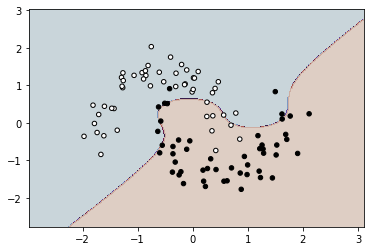

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(1, 1)
plot_contours(ax, poly_svm_clf, xx, yy, cmap=plt.cm.twilight, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.binary, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

## Using Kernel Trick

In [4]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

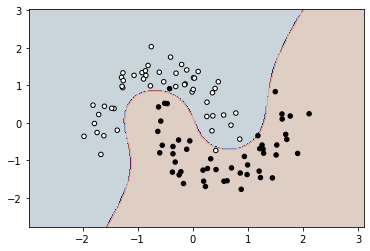

In [5]:
fig, ax = plt.subplots(1, 1)
plot_contours(ax, poly_kernel_svm_clf, xx, yy, cmap=plt.cm.twilight, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.binary, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

## SVM Problem

### 1. 서포트 벡터 머신의 근본 아이디어는 무엇인가요?

ans : 구분해야 하는 class로 묶인 데이터들 사이의 마진을 최대화 하는 결정경게를 찾는 것.
서로 다른 클래스들을 잘 구분하는 결정 경계를 제공함과 동시에 훈련 샘플로부터 이 결정 경계사이의 거리를 최대화 하는 것.

<p style="color:red;"> 
 클래스 사이에 가능한 한 가장 넓은 도로를 내는 것. 두 클래스를 구분하는 결정 경계와 샘플 사이의 마진을 가능한 가장 크게 하는 것이 목적.
</p>

### 2. 서포트 벡터가 무엇인가요?

ans: 결정 경계로부터 훈련 샘플을 멀리 떨어뜨리기 위해서 결정 경계 바깥에 위치한 샘플을 통해 추가적인 마진 경계를 생성하는 것
이러한 훈련 샘플(결정 경계와 가장 가까운 각각의 훈련 샘플)을 서포트 벡터라 한다.

<p style="color:red;">
SVM이 훈련된 후에 경계를 포함해 도로에 놓인 어떤 샘플. 결정 경계는 전적으로 서포트 벡터에 의해 결정된다. 
</p>

### 3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?

ans: SVM은 특성의 스케일에 민감한 방식이다. 한쪽의 스케일이 다른 한쪽의 스케일보다 훨씬 큰 경우에는 결정 경계가 수평하거나 수직인 형태로 나타나게 되며, 이는 스케일이 작은 특성을 무시하게 된다.

### 4. SVM 분류기가 샘플을 분류할 떄 신뢰도와 확률을 출력할 수 있나요?

ans: SVM은 테스트 샘플과 결정 경계 사이의 거리를 출력할 수 있으므로 이를 신뢰도 점수로 활용가능. 하지만, 확률을 출력할 수는 없다. 

### 5. 수백만개의 샘플과 수백 개의 특성을 가진 훈련 세트에 SVM모델을 훈련시키려면 원 문제와 쌍대 문제중 어떤 것을 선택해야 하나요?

ans: 커널 SVM은 쌍대 형식만 사용할 수 있다. 원 문제의 계산 복잡도는 훈련 샘플수에 비례하지만, 쌍대 형식의 계산 복잡도는 그제곱이나 세제곱에 비례한다. 따라서 훈련 샘플의 개수가 많을 경우 쌍대 형식은 느릴 것